# Problem Statement : Predicting the Resale Price of a Vehicle

## Importing the Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns

%matplotlib inline

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 

## Importing the Dataset

In [2]:
dataset=pd.read_csv('autos.csv',encoding='latin1')
dataset

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [3]:
dataset.shape

(371528, 20)

In [4]:
dataset.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [6]:
dataset.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


## Checking for Null Values

In [7]:
dataset.isnull().any()

dateCrawled            False
name                   False
seller                 False
offerType              False
price                  False
abtest                 False
vehicleType             True
yearOfRegistration     False
gearbox                 True
powerPS                False
model                   True
kilometer              False
monthOfRegistration    False
fuelType                True
brand                  False
notRepairedDamage       True
dateCreated            False
nrOfPictures           False
postalCode             False
lastSeen               False
dtype: bool

In [8]:
dataset.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

## Dropping Unwanted Columns

In [9]:
dataset.drop(['name','seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated','model'], axis='columns', inplace=True)

In [10]:
dataset

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,NaN,1993,manuell,0,150000,0,benzin,volkswagen,NaN
1,18300,coupe,2011,manuell,190,125000,5,diesel,audi,ja
2,9800,suv,2004,automatik,163,125000,8,diesel,jeep,NaN
3,1500,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...
371523,2200,NaN,2005,NaN,0,20000,1,NaN,sonstige_autos,NaN
371524,1199,cabrio,2000,automatik,101,125000,3,benzin,smart,nein
371525,9200,bus,1996,manuell,102,150000,3,diesel,volkswagen,nein
371526,3400,kombi,2002,manuell,100,150000,6,diesel,volkswagen,NaN


In [11]:
dataset.isnull().sum()

price                      0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64

## Dropping Null Values

In [12]:
dataset=dataset.dropna()

In [13]:
dataset

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,coupe,2011,manuell,190,125000,5,diesel,audi,ja
3,1500,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein
5,650,limousine,1995,manuell,102,150000,10,benzin,bmw,ja
6,2200,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein
...,...,...,...,...,...,...,...,...,...,...
371520,3200,limousine,2004,manuell,225,150000,5,benzin,seat,ja
371521,1150,bus,2000,manuell,0,150000,3,benzin,opel,nein
371524,1199,cabrio,2000,automatik,101,125000,3,benzin,smart,nein
371525,9200,bus,1996,manuell,102,150000,3,diesel,volkswagen,nein


In [14]:
dataset.isnull().sum()

price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

In [15]:
dataset.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,2.680120e+05,268012.000000,268012.000000,268012.000000,268012.000000
mean,1.670892e+04,2003.183384,126.634039,123957.845171,6.165892
std,4.166542e+06,6.710427,155.758016,40018.897080,3.478367
min,0.000000e+00,1910.000000,0.000000,5000.000000,0.000000
25%,1.500000e+03,1999.000000,77.000000,100000.000000,3.000000
50%,3.800000e+03,2004.000000,116.000000,150000.000000,6.000000
75%,8.600000e+03,2008.000000,150.000000,150000.000000,9.000000
max,2.147484e+09,2018.000000,20000.000000,150000.000000,12.000000


## Getting the count of each and every feature categories

In [16]:
dataset['vehicleType'].value_counts()

limousine     78160
kleinwagen    60706
kombi         54451
bus           25501
cabrio        19203
coupe         15334
suv           12675
andere         1982
Name: vehicleType, dtype: int64

In [17]:
dataset['gearbox'].value_counts()

manuell      205177
automatik     62835
Name: gearbox, dtype: int64

In [18]:
dataset['fuelType'].value_counts()

benzin     174476
diesel      88461
lpg          4184
cng           470
hybrid        242
andere         99
elektro        80
Name: fuelType, dtype: int64

In [19]:
dataset['brand'].value_counts()

volkswagen        55213
bmw               30879
mercedes_benz     27264
opel              26959
audi              25122
ford              17777
renault           11922
peugeot            8125
fiat               6511
seat               5096
skoda              4589
mazda              4153
toyota             3757
citroen            3756
nissan             3654
smart              3424
mini               2898
hyundai            2860
volvo              2619
sonstige_autos     2162
mitsubishi         2125
kia                2009
honda              1997
porsche            1880
alfa_romeo         1740
suzuki             1729
chevrolet          1386
chrysler           1064
dacia               733
land_rover          638
jeep                621
subaru              561
daihatsu            530
jaguar              492
saab                426
daewoo              351
lancia              328
rover               288
trabant             225
lada                149
Name: brand, dtype: int64

In [20]:
dataset['notRepairedDamage'].value_counts()

nein    238707
ja       29305
Name: notRepairedDamage, dtype: int64

In [21]:
dataset = dataset[["vehicleType","yearOfRegistration","gearbox","powerPS","kilometer","monthOfRegistration","fuelType","brand","notRepairedDamage","price"]]

In [22]:
dataset

,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
1,coupe,2011,manuell,190,125000,5,diesel,audi,ja,18300
3,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein,1500
4,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein,3600
5,limousine,1995,manuell,102,150000,10,benzin,bmw,ja,650
6,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein,2200
...,...,...,...,...,...,...,...,...,...,...
371520,limousine,2004,manuell,225,150000,5,benzin,seat,ja,3200
371521,bus,2000,manuell,0,150000,3,benzin,opel,nein,1150
371524,cabrio,2000,automatik,101,125000,3,benzin,smart,nein,1199
371525,bus,1996,manuell,102,150000,3,diesel,volkswagen,nein,9200


## Data Visualization

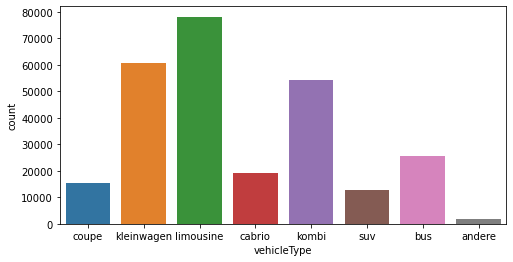

In [23]:
plt.rcParams['figure.figsize']=(8,4)
sns.countplot(dataset['vehicleType']) 

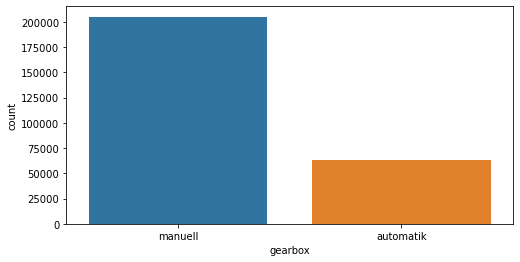

In [24]:
sns.countplot(dataset['gearbox']) 

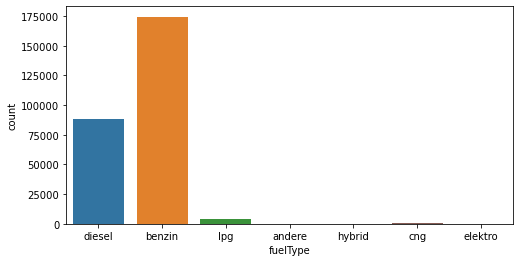

In [25]:
sns.countplot(dataset['fuelType']) 

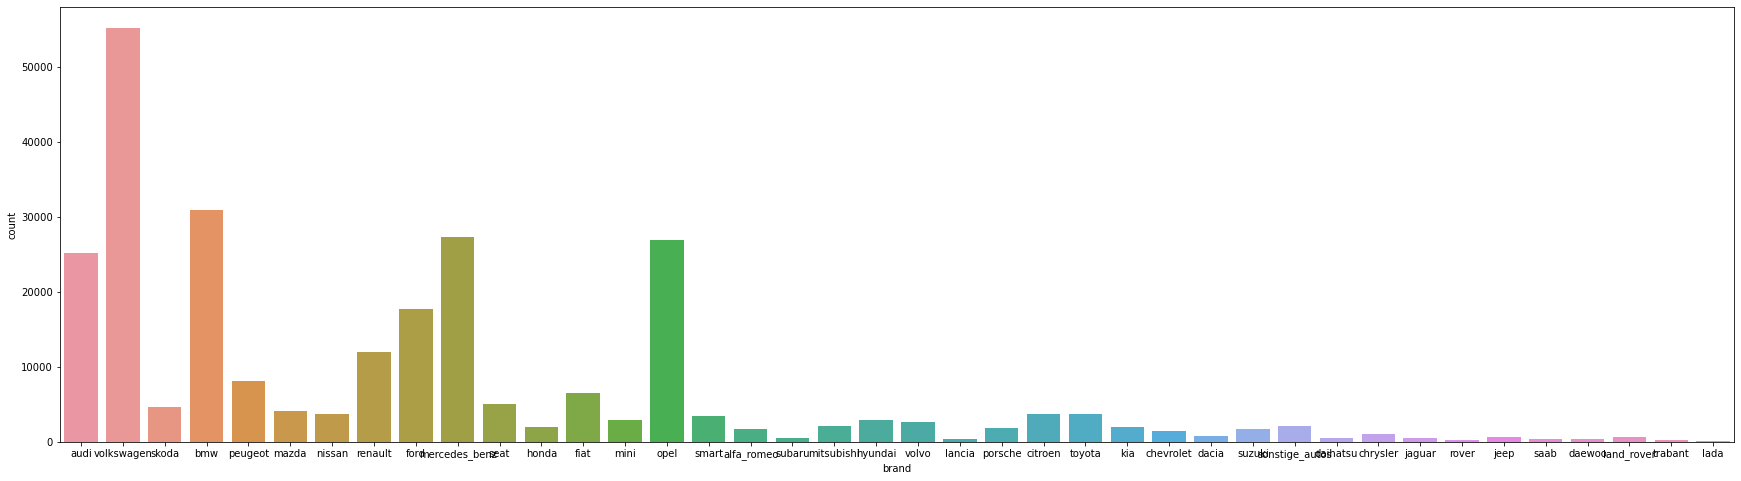

In [26]:
plt.rcParams['figure.figsize']=(30,8)
sns.countplot(dataset['brand'])  

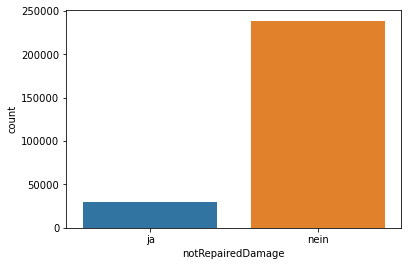

In [27]:
plt.rcParams['figure.figsize']=(6,4)
sns.countplot(dataset['notRepairedDamage']) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD001F6760>,
      dtype=object)

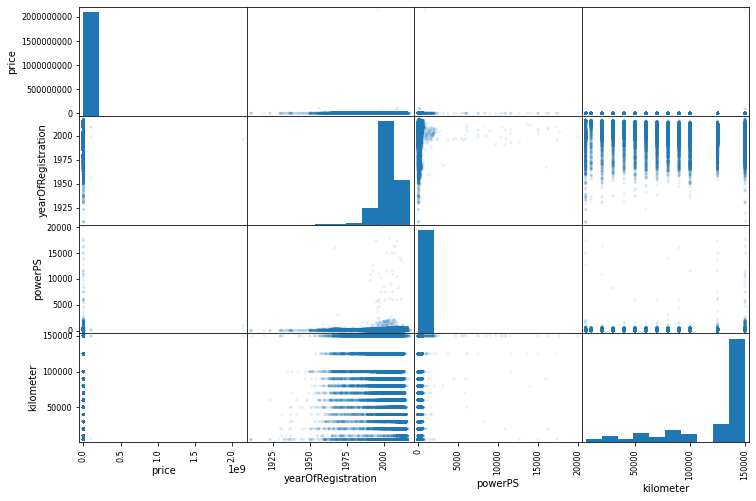

In [28]:
from pandas.plotting import scatter_matrix #used for plotting numerical values
num_attributes = ["price", "yearOfRegistration", "powerPS", "kilometer"]
%matplotlib inline
pd.plotting.scatter_matrix(dataset[num_attributes], figsize = (12,8), alpha = 0.1)

In [29]:
dataset.corr()

,yearOfRegistration,powerPS,kilometer,monthOfRegistration,price
yearOfRegistration,1.000000,0.090961,-0.364613,0.037286,-0.001951
powerPS,0.090961,1.000000,-0.019411,0.014212,0.010033
kilometer,-0.364613,-0.019411,1.000000,-0.006689,0.000150
monthOfRegistration,0.037286,0.014212,-0.006689,1.000000,-0.002426
price,-0.001951,0.010033,0.000150,-0.002426,1.000000


## Find outliers using IQR Score(i.e. IQR=Q3-Q1) and removing them

In [30]:
Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
IQR=Q3-Q1
dataset= dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3 + 1.5*IQR))).any(axis=1)]
dataset

,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
1,coupe,2011,manuell,190,125000,5,diesel,audi,ja,18300
3,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein,1500
4,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein,3600
5,limousine,1995,manuell,102,150000,10,benzin,bmw,ja,650
6,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein,2200
...,...,...,...,...,...,...,...,...,...,...
371518,kombi,2005,manuell,3,150000,5,diesel,bmw,nein,3999
371520,limousine,2004,manuell,225,150000,5,benzin,seat,ja,3200
371521,bus,2000,manuell,0,150000,3,benzin,opel,nein,1150
371524,cabrio,2000,automatik,101,125000,3,benzin,smart,nein,1199


## Finding the Correlation

In [31]:
dataset.corr()

,yearOfRegistration,powerPS,kilometer,monthOfRegistration,price
yearOfRegistration,1.000000,0.200379,-0.448474,0.030236,0.670762
powerPS,0.200379,1.000000,0.078393,0.047560,0.486651
kilometer,-0.448474,0.078393,1.000000,-0.018012,-0.413977
monthOfRegistration,0.030236,0.047560,-0.018012,1.000000,0.048710
price,0.670762,0.486651,-0.413977,0.048710,1.000000


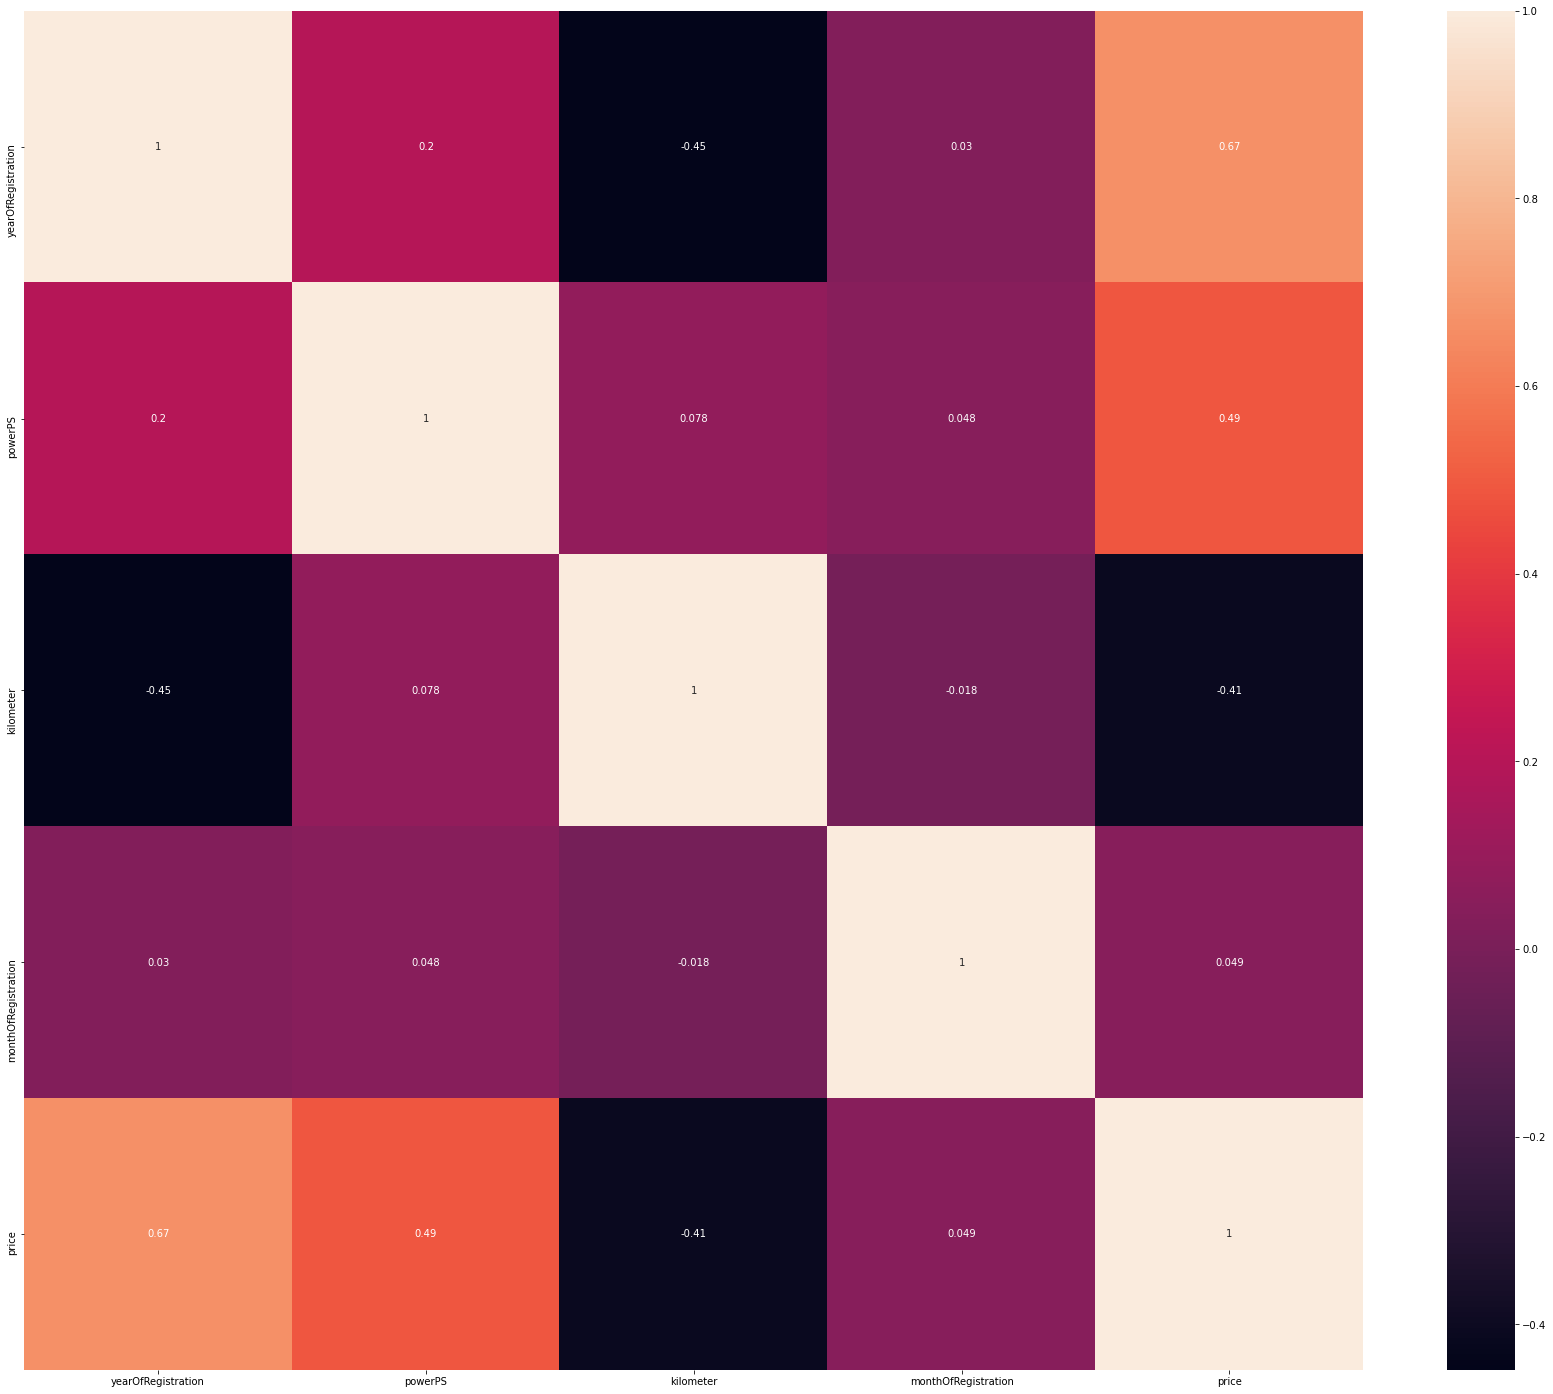

In [32]:
plt.figure(figsize=(30, 25))
p = sns.heatmap(dataset.corr(), annot=True)

In [33]:
PRICE = dataset.corr()['price']
PRICE = abs(PRICE).sort_values()
PRICE

monthOfRegistration    0.048710
kilometer              0.413977
powerPS                0.486651
yearOfRegistration     0.670762
price                  1.000000
Name: price, dtype: float64

In [34]:
dataset.shape

(236513, 10)

## Clean Dataset

In [35]:
dataset

,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
1,coupe,2011,manuell,190,125000,5,diesel,audi,ja,18300
3,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein,1500
4,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein,3600
5,limousine,1995,manuell,102,150000,10,benzin,bmw,ja,650
6,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein,2200
...,...,...,...,...,...,...,...,...,...,...
371518,kombi,2005,manuell,3,150000,5,diesel,bmw,nein,3999
371520,limousine,2004,manuell,225,150000,5,benzin,seat,ja,3200
371521,bus,2000,manuell,0,150000,3,benzin,opel,nein,1150
371524,cabrio,2000,automatik,101,125000,3,benzin,smart,nein,1199


In [36]:
dataset.shape

(236513, 10)

## Seperating Independent and Dependent Variables

In [37]:
x=dataset.iloc[:,0:-1].values
x

array([['coupe', 2011, 'manuell', ..., 'diesel', 'audi', 'ja'],
       ['kleinwagen', 2001, 'manuell', ..., 'benzin', 'volkswagen',
        'nein'],
       ['kleinwagen', 2008, 'manuell', ..., 'diesel', 'skoda', 'nein'],
       ...,
       ['bus', 2000, 'manuell', ..., 'benzin', 'opel', 'nein'],
       ['cabrio', 2000, 'automatik', ..., 'benzin', 'smart', 'nein'],
       ['bus', 1996, 'manuell', ..., 'diesel', 'volkswagen', 'nein']],
      dtype=object)

In [38]:
x.shape

(236513, 9)

In [39]:
y=dataset.iloc[:,-1].values
y

array([18300,  1500,  3600, ...,  1150,  1199,  9200], dtype=int64)

In [40]:
y.shape

(236513,)

## Applying One-hot Encoding on Categorical Variables

In [41]:
x[0]

array(['coupe', 2011, 'manuell', 190, 125000, 5, 'diesel', 'audi', 'ja'],
      dtype=object)

In [42]:
#Categorical Values in x - 0,2,6,7,8 columns-One hot Encoding
#One hot Encoding for Vehicle type
ct=ColumnTransformer([('on',OneHotEncoder(),[0])],remainder='passthrough')
x=ct.fit_transform(x)
x[0]

array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2011, 'manuell', 190,
       125000, 5, 'diesel', 'audi', 'ja'], dtype=object)

In [43]:
x.shape

(236513, 16)

In [44]:
import joblib
joblib.dump(ct,'transform') #Saving the transformed data

['transform']

In [45]:
x=x[:,1:] #Removing the dummy variable i.e first column
x[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2011, 'manuell', 190, 125000, 5,
       'diesel', 'audi', 'ja'], dtype=object)

In [46]:
x.shape

(236513, 15)

In [47]:
#One hot Encoding for gear box
ct=ColumnTransformer([('on',OneHotEncoder(),[8])],remainder='passthrough')
x=ct.fit_transform(x)
x[0]

array([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2011, 190, 125000, 5,
       'diesel', 'audi', 'ja'], dtype=object)

In [48]:
import joblib
joblib.dump(ct,'transform1')

['transform1']

In [49]:
#As there are only 2 kinds in gearbox it will assign 0 or 1,no need to remove the first column
x.shape

(236513, 16)

In [50]:
x[0]

array([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2011, 190, 125000, 5,
       'diesel', 'audi', 'ja'], dtype=object)

In [51]:
#One hot Encoding for fuel type
ct=ColumnTransformer([('on',OneHotEncoder(),[13])],remainder='passthrough')
x=ct.fit_transform(x)
x[0]

array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 2011, 190, 125000, 5, 'audi', 'ja'], dtype=object)

In [52]:
import joblib
joblib.dump(ct,'transform2')

['transform2']

In [53]:
x=x[:,1:]
x[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 2011, 190, 125000, 5, 'audi', 'ja'], dtype=object)

In [54]:
x.shape

(236513, 21)

In [55]:
x[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 2011, 190, 125000, 5, 'audi', 'ja'], dtype=object)

In [56]:
#One hot Encoding for brand
ct=ColumnTransformer([('on',OneHotEncoder(),[19])],remainder='passthrough')
x=ct.fit_transform(x)
x[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 2011, 190, 125000, 5, 'ja'], dtype=object)

In [57]:
import joblib
joblib.dump(ct,'transform3')

['transform3']

In [58]:
x=x[:,1:]
x.shape

(236513, 59)

In [59]:
x[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 2011, 190, 125000, 5, 'ja'], dtype=object)

In [60]:
#One hot Encoding for Not Repaired Damaged
ct=ColumnTransformer([('on',OneHotEncoder(),[-1])],remainder='passthrough')
x=ct.fit_transform(x)
x[0]

array([1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,
       0.0, 0.0, 0.0, 0.0, 2011, 190, 125000, 5], dtype=object)

In [61]:
import joblib
joblib.dump(ct,'transform4')

['transform4']

In [62]:
#As there are only 2 kinds in NotrepairedDamaged it will assign 0 or 1,no need to remove the first column
x.shape

(236513, 60)

## Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 2.75225433, -2.75225433,  3.27053585, ...,  1.4996086 ,
        -0.16192709, -0.33635066],
       [-0.36333851,  0.36333851, -0.30576029, ..., -0.77153068,
         0.59816829, -0.04959663],
       [-0.36333851,  0.36333851, -0.30576029, ..., -0.8900249 ,
        -1.22606063,  0.2371574 ],
       ...,
       [-0.36333851,  0.36333851, -0.30576029, ..., -2.25270846,
         0.59816829, -0.90985871],
       [-0.36333851,  0.36333851, -0.30576029, ..., -0.25805571,
        -0.16192709, -0.90985871],
       [-0.36333851,  0.36333851, -0.30576029, ..., -0.23830667,
         0.59816829, -0.90985871]])

In [64]:
x[0]

array([ 2.75225433, -2.75225433,  3.27053585, -0.34873538, -0.06885439,
       -0.06489945, -0.12372632, -0.05337956, -0.03833152, -0.0465321 ,
       -0.16195443, -0.27531342, -0.0904676 , -0.10638819, -0.03405646,
       -0.04385485, -0.08820757, -0.02186329, -0.03545876, -0.03920661,
       -0.12965245, -0.31723641, -0.10479151, -0.09225568, -0.11961074,
       -0.34947468, -0.18591736, -0.03323782, -0.22601947, -0.03436615,
       -0.04095283, -0.1433608 , -0.13496269, -0.11800033, -0.06204553,
       -0.04579626, -0.08320143, -0.12330292, -0.02157098, -0.52040725,
       -0.10082243, -1.38284324, -0.04375796,  1.4415663 , -0.01216574,
       -0.02759777, -0.12514539, -0.49096788,  0.49096788, -0.33124431,
       -0.26240212,  4.59301193, -0.56898339, -0.51927865, -0.63941141,
       -0.19618889,  1.50320592,  1.4996086 , -0.16192709, -0.33635066])

## Splitting data into train and test

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### Training,Testing and Evaluation of model using Multi-Linear Regression,Decision Tree Regressor,Random Forest Regressor

## Multi Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()

In [67]:
mr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_pred=mr.predict(x_test)
y_pred

array([ 1554.30174017,  6145.55174017, 10574.92674017, ...,
        -573.91700983,  6006.17674017,  -660.01075983])

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.713232873074131

## Decision Tree Regressor

In [70]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion='mse',random_state=0)

In [71]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [72]:
y_pred=dt.predict(x_test)
y_pred

array([1000., 4015., 4750., ...,  610., 2300., 1345.])

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8011791920592324

## Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,criterion='mse',random_state=0)

In [75]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [76]:
y_pred=rf.predict(x_test)
y_pred

array([ 989.37142857, 4231.075     , 9160.35      , ...,  586.41765873,
       4279.23333333, 1354.23333333])

In [77]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8682230655467761

## Cross Validation

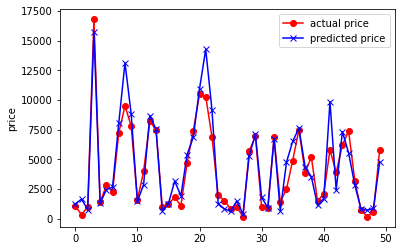

In [83]:
import random
num_samples=50
idx=random.sample(range(len(y_test)),num_samples) 
plt.plot(range(num_samples),y_test[idx],'ro-')
plt.plot(range(num_samples),y_pred[idx],'bx-')
plt.ylabel("price")
plt.legend(["actual price","predicted price","mean price"])

In [79]:
import pickle
#saving the model
filename  = 'vehicleresaleprice.pkl'
scalerFile= 'scaler.pkl'
pickle.dump(rf, open(filename, 'wb'))
pickle.dump(sc, open(scalerFile, 'wb'))

## Observation:

|Algorithm  | Accuracy  |Accuracy in %
|-----------|-----------|--------------
|Multi Linear Regression|0.713232873074131|71.3%
|Decision Tree Regression|0.8011791920592324|80.1%
|Random Forest Regressor|0.8682230655467761|86.8%
